<a href="https://colab.research.google.com/github/shinb-bong/DAP__/blob/main/2021DAP_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime 
import matplotlib.ticker as ticker
import numpy as np

In [82]:
# 자료 데이터 불러오기 
df = pd.read_csv('/content/drive/MyDrive/DAP__/Measurement.csv')
print(df.head())

   Measurement date  Station code  ...  PM10  PM2.5
0  2017-01-01 00:00           101  ...  73.0   57.0
1  2017-01-01 01:00           101  ...  71.0   59.0
2  2017-01-01 02:00           101  ...  70.0   59.0
3  2017-01-01 03:00           101  ...  70.0   58.0
4  2017-01-01 04:00           101  ...  69.0   61.0

[5 rows x 11 columns]


In [83]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB
None


1시간에 한번씩 측정 되었므로 하루씩의 데이터로 변형해준다.
기준 0:00시 기준

In [84]:
Mdf=df[['Measurement date','PM10','PM2.5']]
Mdf=Mdf[::24]
Mdf.head()

,Measurement date,PM10,PM2.5
0,2017-01-01 00:00,73.0,57.0
24,2017-01-02 00:00,93.0,72.0
48,2017-01-03 00:00,148.0,113.0
72,2017-01-04 00:00,36.0,24.0
96,2017-01-05 00:00,49.0,32.0


각 PM10,PM2.5 수치에 대한 전체 평균치

In [85]:
print(Mdf['PM10'].mean())
print(Mdf['PM2.5'].mean())
print(Mdf['PM10'].max())

43.513120830244624
24.637064492216457
3457.0


Datetime을 이용한 Date 설정

In [86]:
import statsmodels.api as sm
Mdf.reset_index(inplace=True)

In [87]:
Mdf['Date'] = pd.to_datetime(Mdf['Measurement date'])
# Mdf = Mdf.set_index('Date')
Mdf

,index,Measurement date,PM10,PM2.5,Date
0,0,2017-01-01 00:00,73.0,57.0,2017-01-01 00:00:00
1,24,2017-01-02 00:00,93.0,72.0,2017-01-02 00:00:00
2,48,2017-01-03 00:00,148.0,113.0,2017-01-03 00:00:00
3,72,2017-01-04 00:00,36.0,24.0,2017-01-04 00:00:00
4,96,2017-01-05 00:00,49.0,32.0,2017-01-05 00:00:00
...,...,...,...,...,...
26975,647400,2019-12-27 09:00,58.0,44.0,2019-12-27 09:00:00
26976,647424,2019-12-28 09:00,48.0,30.0,2019-12-28 09:00:00
26977,647448,2019-12-29 09:00,51.0,33.0,2019-12-29 09:00:00
26978,647472,2019-12-30 09:00,43.0,29.0,2019-12-30 09:00:00


Bar 차트

<BarContainer object of 26980 artists>

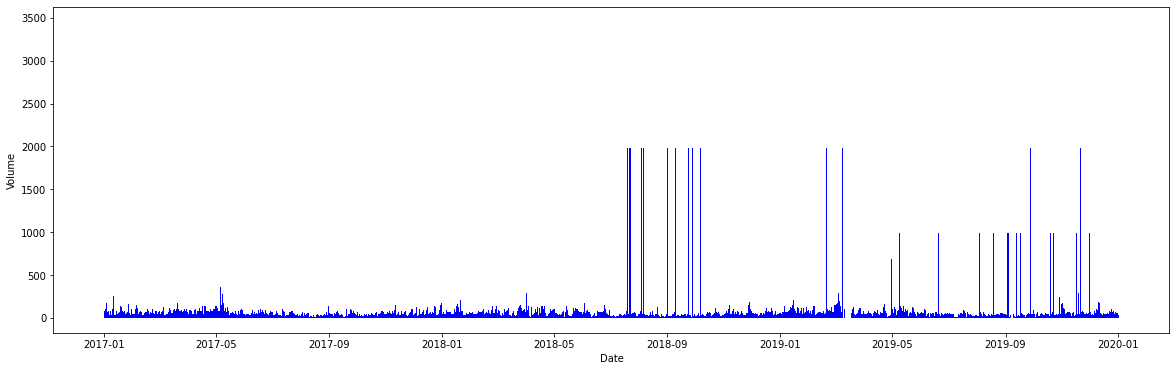

In [99]:
xs=Mdf.Date.to_list()
ys=Mdf['PM10'].to_list()
plt.figure(figsize=(20, 6))
plt.xlabel('Date')
plt.ylabel('Volume')

plt.bar(xs, ys, width=0.6, color='blue')


plot 차트

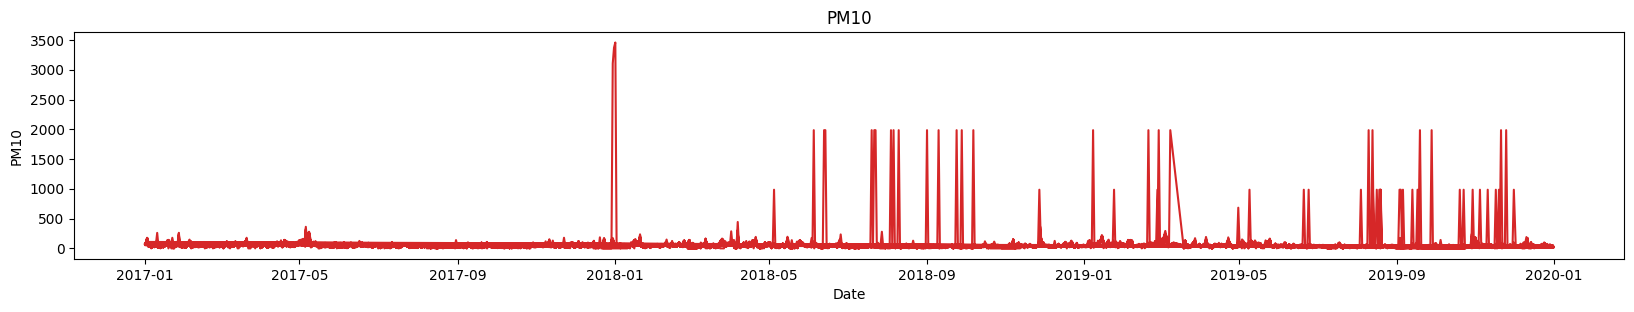

In [64]:
def plot_df(x, y, title="", xlabel='Date', ylabel='PM10', dpi=100):
    plt.figure(figsize=(20,3), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(x=Mdf['Date'], y=Mdf['PM10'], 
        title='PM10')    

너무 튀는 이상치를 줄여보자

In [88]:
attribute = 'PM10'

q1 = Mdf[attribute].quantile(.25)
q3 = Mdf[attribute].quantile(.75)

IQR = q3 -q1
outliers_step = 1.5 *IQR
filter_Mdf=Mdf[(Mdf[attribute]<q1-outliers_step)|
    (Mdf[attribute]>q3+outliers_step)]

filter_Mdf

,index,Measurement date,PM10,PM2.5,Date
2,48,2017-01-03 00:00,148.0,113.0,2017-01-03 00:00:00
18,432,2017-01-19 00:00,99.0,88.0,2017-01-19 00:00:00
35,840,2017-02-05 00:00,116.0,101.0,2017-02-05 00:00:00
79,1896,2017-03-21 00:00,146.0,122.0,2017-03-21 00:00:00
109,2616,2017-04-20 00:00,101.0,22.0,2017-04-20 00:00:00
...,...,...,...,...,...
26892,645408,2019-10-04 21:00,141.0,134.0,2019-10-04 21:00:00
26919,646056,2019-10-31 21:00,169.0,44.0,2019-10-31 21:00:00
26920,646080,2019-11-01 21:00,98.0,41.0,2019-11-01 21:00:00
26921,646104,2019-11-02 21:00,113.0,62.0,2019-11-02 21:00:00


3457.0
188.67179093005382
98.0


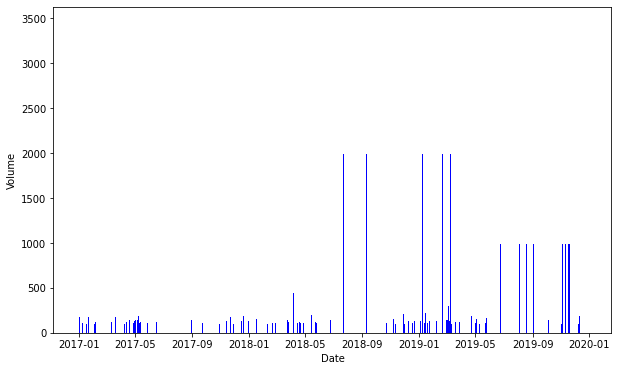

In [101]:
xs=filter_Mdf.Date.to_list()
ys=filter_Mdf['PM10'].to_list()
plt.figure(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Volume')

plt.bar(xs, ys, width=0.6, color='blue')

print(filter_Mdf['PM10'].max())
print(filter_Mdf['PM10'].min())
print(filter_Mdf['PM10'].mean())

미세먼지양에 영향을 미치는게 년도는 의미가 없고
 미세먼지가 일어난 월과 일에 대한 시기가 중요한 것이므로 월과 일을 분리 시켜준다.

 그후 데이터에 추가해준다.

In [96]:
month_list = []
day_list = []
for i in filter_Mdf['Date'] :
  month_list.append(i.strftime('%m'))
  day_list.append(i.strftime('%d'))


filter_Mdf= filter_Mdf.assign(month = month_list)
filter_Mdf= filter_Mdf.assign(day = day_list)
filter_Mdf

,index,Measurement date,PM10,PM2.5,Date,month,day
2,48,2017-01-03 00:00,148.0,113.0,2017-01-03 00:00:00,01,03
18,432,2017-01-19 00:00,99.0,88.0,2017-01-19 00:00:00,01,19
35,840,2017-02-05 00:00,116.0,101.0,2017-02-05 00:00:00,02,05
79,1896,2017-03-21 00:00,146.0,122.0,2017-03-21 00:00:00,03,21
109,2616,2017-04-20 00:00,101.0,22.0,2017-04-20 00:00:00,04,20
...,...,...,...,...,...,...,...
26892,645408,2019-10-04 21:00,141.0,134.0,2019-10-04 21:00:00,10,04
26919,646056,2019-10-31 21:00,169.0,44.0,2019-10-31 21:00:00,10,31
26920,646080,2019-11-01 21:00,98.0,41.0,2019-11-01 21:00:00,11,01
26921,646104,2019-11-02 21:00,113.0,62.0,2019-11-02 21:00:00,11,02


이제 해당 미세먼지가 일어난 월, 일에 대해서 수치와 함께 비교를 진행한다.